# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



- <span style= "color:red;"> SibSp</span>: número de hermanos o cónyuges que viajaban con el pasajero a bordo.
- <span style= "color:red;"> Parch</span>: número de padres o hijos que viajaban con el pasajero a bordo.
- <span style= "color:red;">Ticket</span>: número de ticket del pasajero.
- <span style= "color:red;">Fare</span>: precio pagado por el pasajero por el viaje.
- <span style= "color:red;">Cabin</span>: número de cabina del pasajero.
- <span style= "color:red;">Embarked</span>: puerto de embarque del pasajero: "C" para Cherbourg, "Q" para Queenstown y "S" para Southampton.

## Primeros pasos

Los primeros pasos embarcan los pasos mínimos necesarios antes de empezar a analizar los datos

In [11]:
# Importamos las librerias necesarias 
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly as px
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Leemos el cvs
df  = pd.read_csv(r"/Users/juliobrionesmorales/Documents/GitHub/Analisis-datos-titanic/data/titanic.csv")

In [5]:
# Establecemos codigo para que se pueda representar todas las columnas y filas de dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Imprimimos las primeras filas para poder ver el tipo de datos que tenemos
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
edad_sobrevivir = df.groupby('Survived')['Age'].mean()
edad_sobrevivir

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [8]:
# Vemos información de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver como tenemos 2 columnas con valores nulos

## 1. Número de valores nulos

In [9]:
# Primero representamos el numero de valores nulos por columnas
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

En el resultado anterior se muestra el numero de valores nulos

In [10]:
# Ahora sacamos el porcentaje de valores nulos respecto al total de datos de cada columna
porcentaje_nulos = df.isnull().sum()/len(df)*100
porcentaje_nulos

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

El resultado se muestra el porcentaje de nulos por columna

## 2. Representación gráfica de valores nulos

<Axes: >

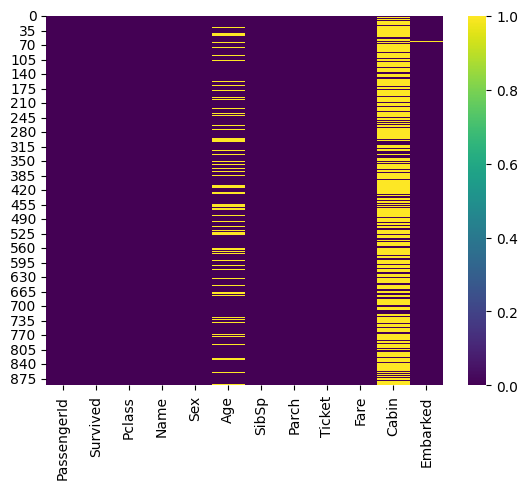

In [11]:
# Ahora vamos hacer una representación gráfico de los valores núlos
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')

Tras representar y ver los valores nulos de nuestras columnas, podemos concluir que las columnas más dañadas son "Age" y "Cabin". La columna "Embarked" también tiene valores nulos pero la cantidad es mínima en comparación con los datos que tenemos.

## 3. Limpieza de columnas

Solo tenemos valores nulos dentro de las columnas de "Age" (19%), "Cabin" (77%) y "Embarked"m (0,2%). 

Como sabemos el porcentaje de valores nulos dentro de cada una de las columnas, podemos determinar que hacer con los datos de cada una de las columnas. Los pasos a seguir son los siguientes: 

1. Columna "Age": reparación de valores sustituyendo valores nulos por la media

2. Columna "Cabin": al tener valores nulos tan elevado (más del 70%), eliminares esta columna porque no son datos fiables para nuestro análisis.

3. Columna "Embarked": reparación de los valores nulos dentro de la columna, sustituyendo los valores nulos por la moda de los datos. 

#### Reparación valores nulos "Age"

In [12]:
# Calculamos la edad media
media_age = df['Age'].mean()

# Sustituimos valores nulos por la media
df.fillna({'Age':media_age}, inplace=True)

#### Eliminacion columna "Cabin"

In [13]:
# Eliminamos la columna "Cabin" de nuestro dataframe
df.drop('Cabin', axis=1, inplace=True)

#### Reparación de valores nulos "Embarked"

In [14]:
# Calculamos la moda de "Embarked"
moda_embarked = df['Embarked'].mode()[0]

#sustituimos valores nulos por la moda
df.fillna({'Embarked':moda_embarked}, inplace=True)

Una vez hecho la reparación y/ eliminación de las columnas correspondientes, representamos gráficamente los valores nulos de nuestro dataframe, establecemos el porcentaje de valores nulos tras la reparación

In [15]:
# Porcentaje de valores nulos
df.isnull().sum()/len(df)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Podemos observar que ya no tenemos valores nulos en valores porcentuales

<Axes: >

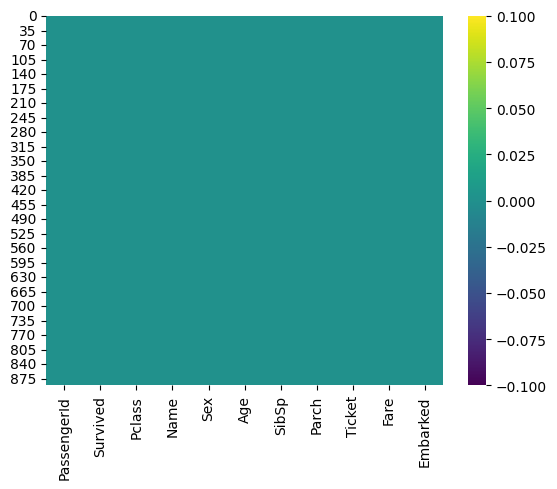

In [16]:
# Representamos gráficamente nuestros valores nulos 
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')

## 4. Edad máxima, mínima y mediana de edades de personas a bordo

Para poder saber la edad máxima y mínima de las personas bordo vamos a tener en cuenta las edadades de la columna "Age".

In [17]:
# Edad máxima
edad_máxima = df['Age'].max()
edad_máxima 

80.0

In [18]:
# Edad mínima
edad_mínima = df['Age'].min()
edad_mínima

0.42

In [19]:
# Mediana de edades
mediana_edades = df['Age'].median().__round__(2)
mediana_edades

29.7

Las edades dentro de nuestro dataframe son las siguientes: 
- Edad máxima : 80 años
- Edad mínima : 0.42 años (bebé)
- Mediana de edad : 29.7 años

In [20]:
# A continuación, se muestra otra forma de poder saber estadísticas númericas dentro de la columna de un dataframe
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

A continuación, realizamos la representación gráfica de los datos obtenidos de la edad.

In [21]:
# Calcula los estadísticos descriptivos de la columna 'Age'
edad_media = df['Age'].mean()
mediana_edad = df['Age'].median()
edad_maxima = df['Age'].max()
edad_minima = df['Age'].min()

# Crea el gráfico de caja
fig = px.box(df, y='Age', title='Diagrama de Caja de Edades', width=800, height=800, template='plotly')

# Añade anotaciones para cada estadístico
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=1, text=f'Edad media: {edad_media:.2f}', showarrow=False)
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.95, text=f'Mediana de edad: {mediana_edad:.2f}', showarrow=False)
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.9, text=f'Edad máxima: {edad_maxima}', showarrow=False)
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.85, text=f'Edad mínima: {edad_minima}', showarrow=False)

fig.show()

## 5. Precios de embarque altos y bajos

Para poder analizar los precios de los billetes, tenemos que tener en cuenta la columna "fare"

In [22]:
# Primero vemos el tipo de datos que tenemos en la columna "Fare"
df['Fare'].dtype

dtype('float64')

In [23]:
# Precio más alto
df['Fare'].max()

512.3292

In [24]:
# Precio más bajo
df['Fare'].min()

0.0

In [25]:
# Ahora aplicamos función describe para que me muestre valores estadísticos dentro de columna "Fare"
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Podemos ver que la desviación estandar (std) es alta, lo que indica una dispersión considerable de los datos.

In [26]:
print(df['Pclass'].unique())
print(df['Embarked'].unique())

[3 1 2]
['S' 'C' 'Q']


Tenemos billetes de primera, segunda y tercera clase, y también tenemos como puertos embarcados S (Southampton), C (Cherbourg) y Q (Queenstown).

In [27]:
# Vamos a realizar una gráfica de cuanto dinero pagaron las personas por su billete en función de la clase en la que viajaron.
# También poddemos hacer una gráfica en función del lugar donde embarcaron
# Otra cosa que podemos hacer es buscar una relación entre estas 2 variables con el precio.


#### Grafico de Precio billete en función de la clase

In [28]:
# Creamos gráfico Scatters (dispersión ) teniendo en cuenta el precio de los billetes y la clase. Añadimos la opción de burbujas más grandes en función del precio
fig = px.scatter(df, y='Pclass', x='Fare', color='Fare', template='plotly', width=900, height=700, size='Fare', size_max=50, title='Precio del billete en función de la Clase')
fig.show()

#### Grafico de Precio billete en función del puerto de embarque

In [29]:
# Creamos gráfico con los valores del precio del billete en función del puerto de embarque
fig = px.scatter(df, y= 'Embarked', x= 'Fare', color = 'Fare', template='plotly', width=900, height=700, size='Fare', size_max=50, title='Precio del billete en función del puerto de embarque')
fig.show()

#### Grafico del precio del billete en función del puerto de embarque y clase del billlete

In [30]:
# Gráfico Scatters (dispersión) tiendo en cuenta el precio del billet en función del puerto de embarque y el la clase del billete
fig=px.scatter(df, x='Fare', y='Embarked', color='Fare', template='plotly',
               width=900, height=700, size= 'Fare', size_max=50,
               title='Precio del billte en función del puerto de embarque y la clase del billete',
               facet_col='Pclass', facet_col_wrap=1) 
"""
facet_col='Pclass', facet_col_wrap=1: Divide el gráfico en subgráficos (facetas) basados en los valores de la variable Pclass (clase del billete). 
facet_col_wrap=1 asegura que cada subgráfico se muestre en una sola fila.
"""
# Mostramos el gráfico combinado 
fig.show()


Podemos observar que por general el precio de los billetes de la clase 1 es mucho mayor que los precio de las otras clases de billetes. 

También concluimos que el precio del billete el puerto 'C = Cherbourg' es el más caro en comparación con los precios de los billetes de primera clase los otros puertos. 

## 6. Número de pasajeros embarcados

Para poder saber el número de pasajeros embarcados vamos a tener en cuenta los datos de la columna "Embarked"

In [31]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Los valores que nos salen dentro la columna "Embarked" son 'S, C y Q'. Los significamos de los mismos son los siguientes: 
- 'S' : Southampton
- 'C' : Cherbourg
- 'Q' : Queenstown

In [32]:
# Calculamos el numero de personas embarcadas por ciudad
ciudad_embarcadas = df['Embarked'].value_counts()
ciudad_embarcadas

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
# Porcentajes embarcados por ciudad
porcentajes_embarcados_ciudad = df['Embarked'].value_counts()/len(df)*100
porcentajes_embarcados_ciudad

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

### Gráfico de pasajeros embarcados en función del puerto de embarque

In [34]:
# Calculamos el número de pasajeros embarcados en cada ciudad
ciudades_embarcadas = df['Embarked'].value_counts().reset_index()
ciudades_embarcadas.columns = ['Ciudad', 'Cantidad de Pasajeros']

# Creamos el gráfico de barras con Plotly Express
fig = px.bar(ciudades_embarcadas, x='Ciudad', y='Cantidad de Pasajeros', 
             color='Ciudad', template='plotly', 
             title='Cantidad de pasajeros embarcados por ciudad', width=700, height=500)
# Actualizamos el nombre del título de nuestros ejes
fig.update_layout(xaxis_title='Ciudad de embarque', yaxis_title='Cantidad de pasajeros')
# Mostramos el gráfico
fig.show()


In [35]:
# Calcular los porcentajes de pasajeros embarcados en cada ciudad
porcentajes_embarcados_ciudad = df['Embarked'].value_counts() / len(df) * 100
porcentajes_embarcados_ciudad = porcentajes_embarcados_ciudad.reset_index()
porcentajes_embarcados_ciudad.columns = ['Ciudad', 'Porcentaje']

# Creamos el gráfico de pastel con Plotly Express
fig = px.pie(porcentajes_embarcados_ciudad, names='Ciudad', values='Porcentaje', 
             title='Porcentaje de pasajeros embarcados por ciudad', width=700, height=500)
# Mostramos nuestro gráfico
fig.show()


Como podemos observar la ciudad más embarcada es Southampton con 646 personas, lo que representa el 76,50% personas embarcados en el Titanic

## 7.Distribución de sexos de las personas embarcadas

Para poder ver la distribución de sexos tenemos que tener en cuenta los valores de la columna "Sex"

In [36]:
# Vemos los valores que tenemos en la columna "Sex"
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
# Valores de la distribución de sexos
numero_distribucion_sexos = df['Sex'].value_counts()
numero_distribucion_sexos

male      577
female    314
Name: Sex, dtype: int64

### Gráfico de número de hombres y mujeres 

In [38]:
# Calculamos el número de número de hombres y mujeres embarcados
sexos_embarcados = df['Sex'].value_counts().reset_index()
sexos_embarcados.columns = ['Sexo','Cantidad de pasajeros']

# Creamos el gráfico de barras con Plotly Express
fig = px.bar (sexos_embarcados, x='Sexo', y='Cantidad de pasajeros', 
              color='Sexo', template='plotly',
              title='Numero de hombres y mujeres embarcados', width=700, height=500)

# Actualizamos el nombres del título del nuestros ejes
fig.update_layout(xaxis_title='Tipo de Sexo', yaxis_title='Cantidad de pasajeros')
# Mostramos el gráfico
fig.show()

In [39]:
# Porcentaje de valores de distribución de sexos
porcentaje_distribucion_sexos = df['Sex'].value_counts()/len(df)*100
porcentaje_distribucion_sexos

male      64.758698
female    35.241302
Name: Sex, dtype: float64

### Grafico con porcentajes de hombres y mujeres embarcados

In [40]:
# Calcular los porcentajes de pasajeros embarcados en cada ciudad
porcentajes_embarcados_ciudad = df['Embarked'].value_counts() / len(df) * 100
porcentajes_embarcados_ciudad = porcentajes_embarcados_ciudad.reset_index()
porcentajes_embarcados_ciudad.columns = ['Ciudad', 'Porcentaje']

# Creamos el gráfico de pastel con Plotly Express
fig = px.pie(porcentajes_embarcados_ciudad, names='Ciudad', values='Porcentaje', 
             title='Porcentaje de pasajeros embarcados por ciudad')
# Mostramos nuestro gráfico
fig.show()

In [41]:
# Calculamos el porcentaje hombres y mujeres embarcados
porcentaje_sexos = df['Sex'].value_counts()/len(df)*100
porcentaje_sexos = porcentaje_sexos.reset_index()
porcentaje_sexos.columns = ['Sexos', 'Porcentaje']

# Creamos el gráfico de pastel con Plotly Express
fig = px.pie (porcentaje_sexos, names='Sexos', values='Porcentaje', title='Porcentaje de sexos embarcados', width=700, height=500)
# Mostramos el gráfico
fig.show()

Como podemos observar en la gráfica anterior, ya no tenemos valores nulos.

* Ver el número de valores nulos        <span style = "color: red;"> <b>(hecho) </span>
* Representar el porcentaje de filas con atributos nulos.   <span style = "color: red;"> <b>(hecho) </span>
* Limpieza de columnas.   <span style = "color: red;"> <b>(hecho) </span>
* Saber la edad mínima y máxima de las personas del barco. <span style = "color: red;"> <b>(hecho) </span>
* Conocer la mediana de las edades. <span style = "color: red;"> <b>(hecho) </span>
* Ver los precios (columna `fares`) más altos y bajos. <span style = "color: red;"> <b>(hecho) </span>
* Número de pasajeros embarcados (columna `Embarked`). <span style = "color: red;"> <b>(hecho) </span>
* Ver la distribución de sexos en las personas embarcadas. <span style = "color: red;"> <b>(hecho) </span>

sacar estadística de supervivientes porcentaje 

## 8.Número de Supervivientes

In [42]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [43]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

Entendemos que "0" significa que no sobrevivió y "1" que si sobrevivió.

In [44]:
# Calculamos los porcentajes de supervivencia por edad y sexo
sobrevivir_edad = df.groupby(['Age', 'Sex'])['Survived'].value_counts(normalize=True) * 100
sobrevivir_edad = sobrevivir_edad.rename('Porcentaje').reset_index()

# Creamos un gráfico de dispersión (scatter plot)
fig = px.scatter(sobrevivir_edad, 
                 x='Age', 
                 y='Porcentaje', 
                 color='Sex',
                 facet_col='Survived',
                 title='Porcentaje de supervivencia por edad y sexo',
                 labels={'Age': 'Edad', 'Porcentaje': 'Porcentaje de supervivencia'},
                 width=900,
                 height=600, size='Age', size_max=15)

# Mostrar el gráfico
fig.show()

Como podemos ver, hubo más probabilidades de sobrevivir si eras mujer y niño. En cambio, si eras hombre y poco mayor, tenías menos probabilidaes de sobrevivir. 

In [45]:
sobrevivir_edad

,Age,Sex,Survived,Porcentaje
0,0.420000,male,1,100.000000
1,0.670000,male,1,100.000000
2,0.750000,female,1,100.000000
3,0.830000,male,1,100.000000
4,0.920000,male,1,100.000000
5,1.000000,female,1,100.000000
6,1.000000,male,1,60.000000
7,1.000000,male,0,40.000000
8,2.000000,female,0,66.666667
9,2.000000,female,1,33.333333
